In [1]:
pwd

'/Users/rachelbrynsvold/dsi/capstone_dir/Capstone/notebooks'

In [2]:
#you are here ^

In [3]:
cd ../py_scripts

/Users/rachelbrynsvold/dsi/capstone_dir/Capstone/py_scripts


In [4]:
ls

__init__.py                   fit_gensim_lda.py
__pycache__/                  fit_gensim_lda.py.bak
dimensional_reduction.py      metadata_extraction.py
dimensional_reduction.py.bak  metadata_extraction.pyc
fit_doc2vec.py                utils_streamers.py


In [5]:
import os, codecs
import gensim
from gensim import corpora
from collections import defaultdict
import string
from string import punctuation
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import utils_streamers
from utils_streamers import DirFileMgr, IterFile, CorpStreamer, BOWCorpStreamer

#### This should be all the information needed for this notebook's relative path assignment!
Confirm the dist_string matches the one you entered for your dimensional reduction and model fitting   
Confirm the header for the outputs_dir   
Make sure the outputs_dir exists

### Enter string used for identifier for saving dimensional reduction objects:

In [6]:
dr_id_str = "ff_50_15p"

Set up needed objects:

In [7]:
fps = DirFileMgr(dr_id_str)
fps.create_all_dr_fps()

Rerun script and provide unused identifier string
Which data set will be used? Enter either '5000' or '95': 95
source dir is assigned as ../books/clean/
corpus lst fp is assigned as  ../outputs-git_ignored/ff_50_15p/ff_50_15p_lst.txt
dictionary fp is assigned as  ../outputs-git_ignored/ff_50_15p/ff_50_15p.dict
counts dictionary fp is assigned as  ../outputs-git_ignored/ff_50_15p/ff_50_15p_json.txt


In [8]:
# c_fp = outputs_dir + dist_string + 'dim_r_chart'

In [33]:
with open(fps.counts_fp) as f:
    d = json.load(f)
    
print (d, type(d))

{'tokenized': {'avg_unique': 4432, 'total_vocab': 1278171, 'avg_words': 48190}, 'tok_and_sw': {'avg_unique': 4318, 'total_vocab': 1278018, 'avg_words': 20614}, 'freq_filtered': {'avg_unique': 2747, 'total_vocab': 100000, 'avg_words': 6775}} <class 'dict'>


In [34]:
print ("Average unique words per book: ")
print ("   ", "Initial (tokenized): ", d['tokenized']['avg_unique'])
print ("   ", "Stop words removed: ", d['tok_and_sw']['avg_unique'])
print ("   ", "Frequency filtered: ", d['freq_filtered']['avg_unique'])
print ("   ")

print ("Average word count per book: ")
print ("   ", "Initial (tokenized): ", d['tokenized']['avg_words'])
print ("   ", "Stop words removed: ", d['tok_and_sw']['avg_words'])
print ("   ", "Frequency filtered: ", d['freq_filtered']['avg_words'])
print ("   ")

print ("Vocabulary length: ")
print ("   ", "Initial (tokenized): ", d['tokenized']['total_vocab'])
print ("   ", "Stop words removed: ", d['tok_and_sw']['total_vocab'])
print ("   ", "Frequency filtered: ", d['freq_filtered']['total_vocab'])

Average unique words per book: 
    Initial (tokenized):  4432
    Stop words removed:  4318
    Frequency filtered:  2747
   
Average word count per book: 
    Initial (tokenized):  48190
    Stop words removed:  20614
    Frequency filtered:  6775
   
Vocabulary length: 
    Initial (tokenized):  1278171
    Stop words removed:  1278018
    Frequency filtered:  100000


In [12]:
sec_keys_lst = ['total_vocab', 'avg_words', 'avg_unique']
tokenized_lst = [d['tokenized'][key] for key in sec_keys_lst]
stop_words_removed_lst = [d['tok_and_sw'][key] for key in sec_keys_lst]
frequency_filtered_lst = _lst = [d['freq_filtered'][key] for key in sec_keys_lst]
tokenized_lst, stop_words_removed_lst, frequency_filtered_lst

([1278171, 48190, 4432], [1278018, 20614, 4318], [100000, 6775, 2747])

In [13]:
sec_keys_lst

['total_vocab', 'avg_words', 'avg_unique']

In [14]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_autogen_docstring',
 '_backend_mod',
 '_backend_selection',
 '_hold_msg',
 '_imread',
 '_imsave',
 '_interactive_bk',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 '_string_to_bool',
 'absolute_import',


In [15]:
def dim_reduction_chart(d, tokenized_lst=tokenized_lst, \
                            stop_words_removed_lst=stop_words_removed_lst, \
                            frequency_filtered_lst=frequency_filtered_lst, \
                           c_fp=None):   
    n_groups = 3

    dim_red_1 = tokenized_lst
    print(dim_red_1)
    
    dim_red_2 = stop_words_removed_lst
    print(dim_red_2)

    dim_red_3 = frequency_filtered_lst
    print(dim_red_3)


    fig, ax = plt.subplots()

    pos = list(range(n_groups))
    print(pos)
    bar_width = 0.25

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(pos, 
                     dim_red_1, bar_width,
                     alpha=opacity,
                     #color='b',
                     label='Tokenized (init)')

    rects2 = plt.bar([p + bar_width for p in pos], 
                     dim_red_2, bar_width,
                     alpha=opacity,
                     #color='b',
                     label='Stop Word Removal')

    rects3 = plt.bar([p + bar_width*2 for p in pos], 
                     dim_red_3, bar_width,
                     alpha=opacity,
                     #color='b',
                     label= 'Frequency Filtering')

    plt.xlabel('Group')
    plt.yscale('log')
    plt.ylabel('Number of Words')
    plt.title('Counts Over Dimensionality Reduction')
    plt.xticks([p + bar_width/2 for p in pos] , ('Total vocab size', \
                                                   'Avg total per book', \
                                                   'Avg unique per book'))
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    if c_fp != None:
        plt.savefig(c_fp)

[1278171, 48190, 4432]
[1278018, 20614, 4318]
[100000, 6775, 2747]
[0, 1, 2]


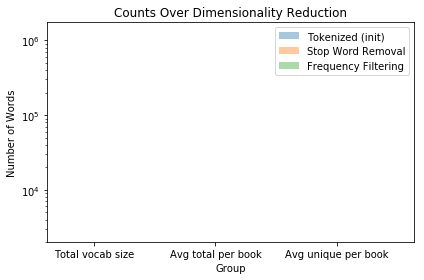

In [16]:
dim_reduction_chart(d)